<a href="https://colab.research.google.com/github/Amarnath-Jakapure/Bank-Customer-Churn/blob/main/Bank_Customer_Churn_%F0%9F%8F%A6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn 🏦 Using (python,pandas,seaborn,metplotlib,)**

**library import**

In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Read dataseat**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bank Customer Churn Prediction.csv")
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9366,15656009,736,France,Female,36,6,0.00,1,1,0,70496.66,0
1609,15750248,619,France,Female,35,8,132292.63,1,1,0,65682.93,0
4323,15579566,616,Spain,Female,43,3,120867.18,1,1,0,18761.92,1
8261,15570855,670,France,Male,38,7,0.00,2,1,1,77864.41,0
7340,15578722,689,France,Male,39,4,0.00,2,1,0,196112.45,0


**Number of rows and columns**

In [4]:
print(f"Number of rows:{df.shape[0]}\nNumber of columns:{df.shape[1]}")

Number of rows:10000
Number of columns:12


**Info of dataseat**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Null vsalues by columns**

In [6]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


**Describe the dataseat**

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**By the columns count,null,persentage of null value,Cardinality**

In [8]:
pd.DataFrame({"count":df.shape[0],
              "Null":df.isnull().sum(),
              "Null %":df.isna().mean() * 100,
              "Cardinality":df.nunique()
              })

,count,Null,Null %,Cardinality
customer_id,10000,0,0.0,10000
credit_score,10000,0,0.0,460
country,10000,0,0.0,3
gender,10000,0,0.0,2
age,10000,0,0.0,70
tenure,10000,0,0.0,11
balance,10000,0,0.0,6382
products_number,10000,0,0.0,4
credit_card,10000,0,0.0,2
active_member,10000,0,0.0,2


**Duplicate values in dataseat**

In [9]:
df.duplicated().sum()

0

**Customer Distribution by Country**

In [10]:
df["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df["customer_id"].count()

10000

<ipython-input-12-d891aa7b249e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="country", palette="viridis")


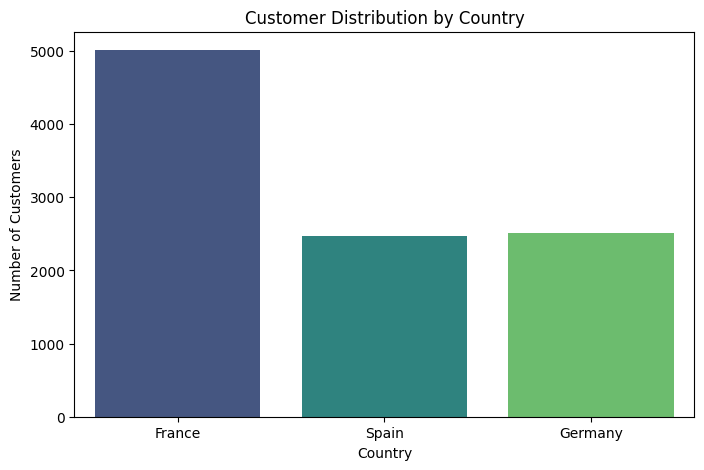

In [12]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="country", palette="viridis")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Country")
plt.show()

**Distribution of Credit Score For Male and Females**

In [13]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

<ipython-input-14-b01b4615596e>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


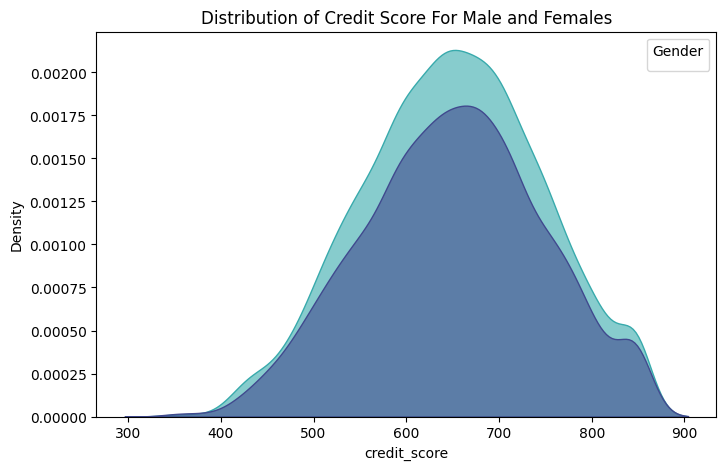

In [14]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Credit Score For Male and Females")
sns.kdeplot(data=df,x="credit_score",hue="gender",fill=True,palette='mako',alpha=0.6)
plt.legend(title="Gender")
plt.show()

- In General Credit Score around from 600 to 700
- Credit Score for Male around from 500 to 600
- Credit Score for Female around from 600 to 700

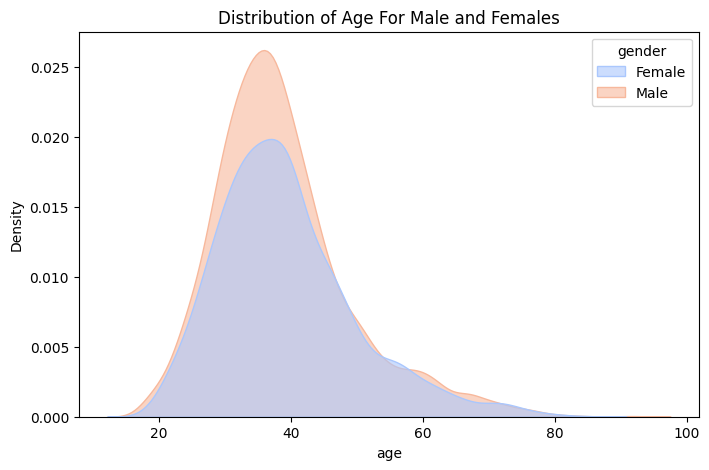

In [15]:
plt.figure(figsize=(8,5))
plt.title("Distribution of Age For Male and Females")
sns.kdeplot(data=df,x="age",hue="gender",fill=True,palette="coolwarm",alpha=0.6)
plt.show()

- Age for Male around from 30 to 40
- Age for Female around from 40 to 60

**Number of years the customer has been with the bank**

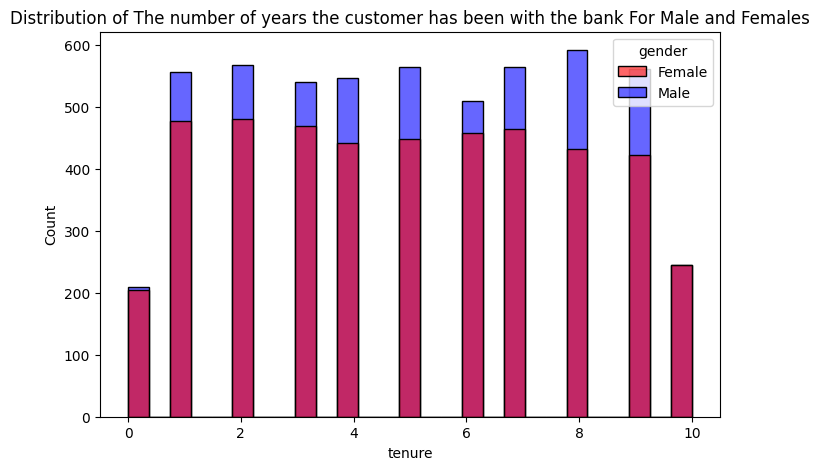

In [16]:
plt.figure(figsize=(8,5))
plt.title("Distribution of The number of years the customer has been with the bank For Male and Females")
sns.histplot(data=df,x="tenure",hue="gender",kde=False,palette={"Male":"blue","Female":"red"},alpha=0.6)
plt.show()

**Distribution of Balance For Male and Females and Distribution of Estimated Salary For Male and Females**

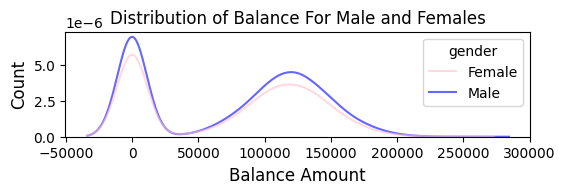

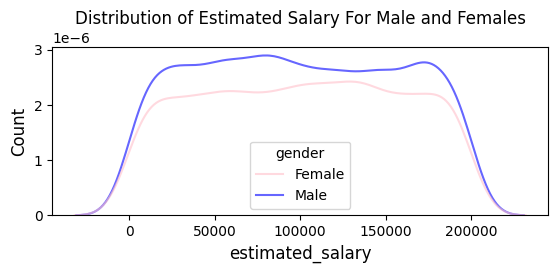

In [17]:
plt.figure(figsize=(6,3))
plt.subplot(2,1,1)
plt.title("Distribution of Balance For Male and Females")
sns.kdeplot(data=df,x="balance",hue="gender",palette={"Male":"blue","Female":"pink"},alpha=0.6)
plt.xlabel("Balance Amount", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

plt.subplot(2,1,2)
plt.title("Distribution of Estimated Salary For Male and Females")
sns.kdeplot(data=df,x="estimated_salary",hue="gender",palette={"Male":"blue","Female":"pink"},alpha=0.6)
plt.xlabel("estimated_salary", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

- Higher Estimated Salary Higher Balance
- Most Estimated Salary for Female from 100000 to 150000
- Most Estimated Salary for Male from 150000 to 200000

**Is this Customer have Credit Card ?**

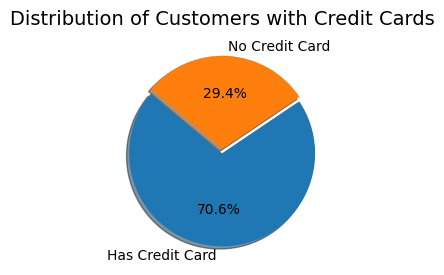

In [18]:
credit_card_counts = df["credit_card"].value_counts()
labels = ["Has Credit Card", "No Credit Card"]
colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(3, 4))
plt.pie(credit_card_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, explode=[0.05, 0], shadow=True)
plt.title("Distribution of Customers with Credit Cards", fontsize=14)
plt.show()


**Total insights**
- In General Credit Score around from 600 to 700
- Credit Score for Male around from 500 to 600
- Credit Score for Female around from 600 to 700
- Most Customer from France
- Age for Male around from 30 to 40
- Age for Female around from 40 to 60
- Most The number of years the Customer has been with the - - bank is Males
- Higher Estimated Salary Higher Balance
- Most Estimated Salary for Female from 100000 to 150000
- Most Estimated Salary for Male from 150000 to 200000
- 70% Of Customer Have Credit Card

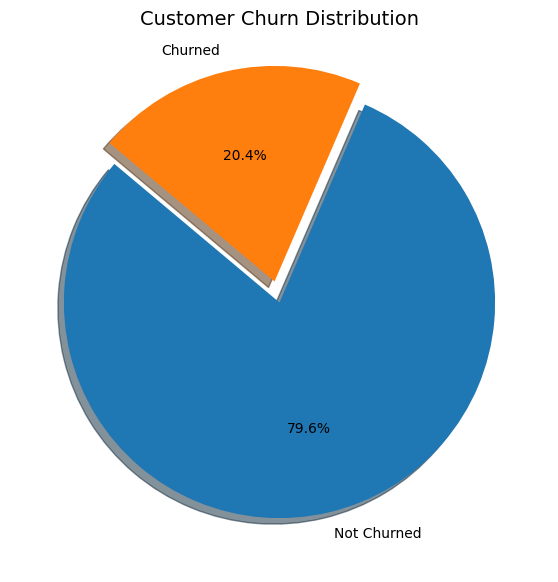

In [19]:
churn_counts = df["churn"].value_counts()
labels = ["Not Churned", "Churned"]
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Not Churned, Orange for Churned
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, autopct="%1.1f%%", colors=colors,
        startangle=140, explode=[0, 0.1], shadow=True)
plt.title("Customer Churn Distribution", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

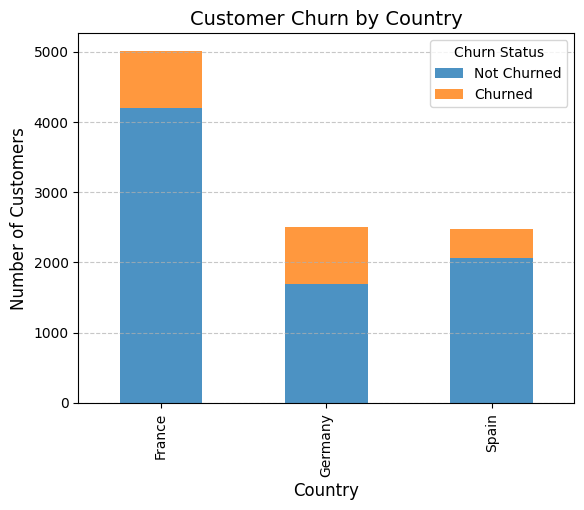

In [20]:

churn_by_country = df.groupby("country")["churn"].value_counts().unstack()
plt.figure(figsize=(12, 6))
churn_by_country.plot(kind="bar", stacked=True, color=["#1f77b4", "#ff7f0e"], alpha=0.8)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Customer Churn by Country", fontsize=14)
plt.legend(["Not Churned", "Churned"], title="Churn Status")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<BarContainer object of 2 artists>

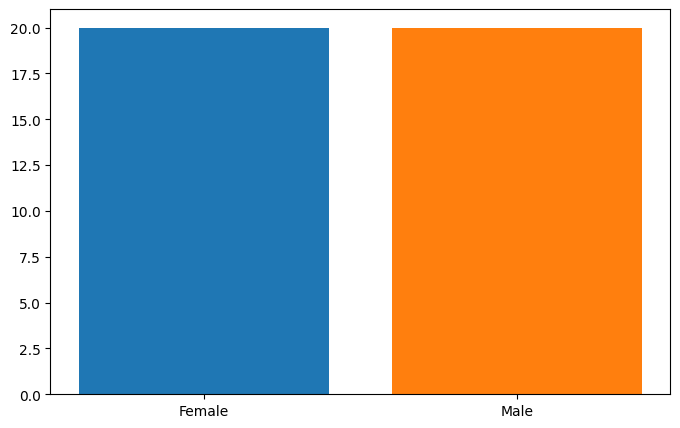

In [25]:
credit_score_by_gender = df.groupby("gender")["credit_score"].mean()
plt.figure(figsize=(8, 5))
plt.bar(data=credit_score_by_gender,height=20,x=credit_score_by_gender.index,color=["#1f77b4", "#ff7f0e"])